In [1]:
import pandas as pd

df = pd.read_csv("dataset_mood_smartphone.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376912 entries, 0 to 376911
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  376912 non-null  int64  
 1   id          376912 non-null  object 
 2   time        376912 non-null  object 
 3   variable    376912 non-null  object 
 4   value       376710 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.4+ MB


In [2]:
df.head(30)

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0
5,6,AS14.01,2014-02-27 12:00:00.000,mood,6.0
6,7,AS14.01,2014-02-27 15:00:00.000,mood,7.0
7,8,AS14.01,2014-03-21 09:00:00.000,mood,6.0
8,9,AS14.01,2014-03-21 11:00:00.000,mood,6.0
9,10,AS14.01,2014-03-21 15:00:00.000,mood,7.0


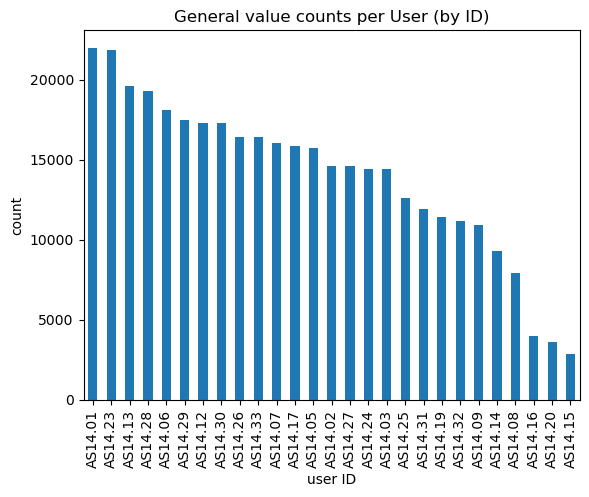

In [3]:
import matplotlib.pyplot as plt
df.id.value_counts().plot(kind="bar")
plt.title("General value counts per User (by ID)")
plt.xlabel("user ID")
plt.ylabel("count")
plt.show()
# we can see that data is not evenly distributed per USER ID


In [4]:
# check each variable range, type etc
df['id'].unique()

array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'], dtype=object)

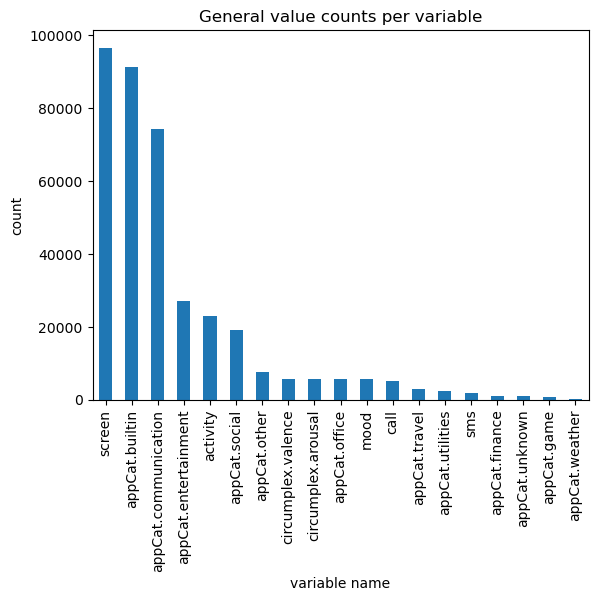

In [5]:
df.variable.value_counts().plot(kind="bar")
plt.title("General value counts per variable")
plt.xlabel("variable name")
plt.ylabel("count")
plt.show()


In [6]:
df['time'] = pd.to_datetime(df["time"])

In [7]:
df['time'].min(), df['time'].max()

(Timestamp('2014-02-17 07:00:52.197000'), Timestamp('2014-06-09 00:00:00'))

In [8]:
# time delta
df['time'].max() - df['time'].min()

Timedelta('111 days 16:59:07.803000')

In [9]:
grouped = df.groupby([df["id"], "variable"])["value"].count()

In [10]:
df.groupby(["id"])["time"].describe(datetime_is_numeric=True)

,count,mean,min,25%,50%,75%,max
id,,,,,,,
AS14.01,21999,2014-04-11 10:41:16.109324544,2014-02-17 12:04:42.394000,2014-04-01 11:24:20.533499904,2014-04-09 23:45:53.169999872,2014-04-22 21:03:45.575000064,2014-05-05 10:00:00
AS14.02,14581,2014-03-30 05:42:22.284717312,2014-02-17 07:00:52.197000,2014-03-22 03:56:43.344999936,2014-03-30 11:16:32.537999872,2014-04-07 13:16:26.048000,2014-04-25 21:00:00
AS14.03,14425,2014-04-13 13:36:07.361276672,2014-02-17 16:28:23,2014-03-31 20:54:17.115000064,2014-04-14 10:56:08.931000064,2014-04-25 17:47:15.559000064,2014-05-08 05:00:00
AS14.05,15745,2014-04-10 01:13:49.002739456,2014-02-18 13:07:45.496000,2014-03-28 11:54:56.742000128,2014-04-10 21:23:25.507000064,2014-04-22 17:48:03.806000128,2014-05-05 15:00:00
AS14.06,18092,2014-04-15 05:02:48.224832768,2014-02-17 07:12:13.631000,2014-04-03 20:25:55.427000064,2014-04-16 09:38:01.856000,2014-04-25 15:22:01.620749824,2014-05-08 09:00:00
AS14.07,16045,2014-04-08 19:55:07.926596608,2014-03-17 21:03:46.401000,2014-03-27 12:36:41.508999936,2014-04-06 20:30:04.788000,2014-04-21 12:43:24.950000128,2014-05-05 20:00:00
AS14.08,7902,2014-04-07 23:15:18.580883712,2014-02-17 12:51:38.029000,2014-03-26 20:01:27.836999936,2014-04-08 07:25:11.775500032,2014-04-19 20:48:13.592499968,2014-05-05 15:00:00
AS14.09,10886,2014-04-04 15:46:14.620254208,2014-02-17 10:47:29.664000,2014-03-28 12:03:43.372749824,2014-04-03 14:15:57.664499968,2014-04-09 19:16:09.062499840,2014-05-05 12:00:00
AS14.12,17311,2014-04-15 16:07:53.462164224,2014-02-19 17:30:36.497000,2014-04-06 01:54:55.260999936,2014-04-15 22:17:56.216000,2014-04-24 15:21:14.097500160,2014-05-05 18:00:00


In [11]:
value_statistics = df.groupby([df["id"], "variable"])["value"].describe()

In [15]:
from pandas_profiling import ProfileReport
df = df.drop("Unnamed: 0", axis=1)
profile = ProfileReport(df, title="Report")
profile

Render HTML: 100%|████████████████████████████████| 1/1 [00:00<00:00,  9.31it/s]
